1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

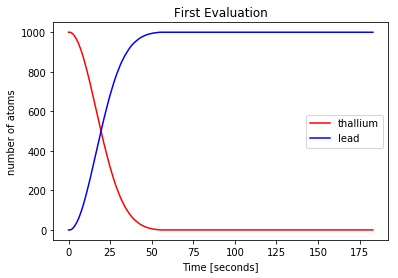

Decay time (in seconds) 55


In [4]:
import numpy as np
import matplotlib.pyplot as plt

tau = int(np.ceil(3.052*60))
def prob1(t, tau):
    return 1 - 2**(-t/tau)

def decay1(r, atom_thal, prob):
    temp = np.array([atom_thal])
    for i in range(r - 1):
        temp = np.append(temp, int(temp[i] - prob[i]*temp[i]) )
    return temp

t = np.arange(tau)
atom_thal = 1000
atom_lead = 0
temp_thal = decay1(tau, atom_thal, prob1(t, tau))
temp_lead = atom_thal - temp_thal
decay_time = t[temp_thal == 0][0]

plt.title('First Evaluation')
plt.xlabel('Time [seconds]')
plt.ylabel('number of atoms')
plt.plot(t, temp_thal,color='r')
plt.plot(t, temp_lead,color='b')
plt.legend(['thallium', 'lead'])
plt.show()
print('Decay time (in seconds)', decay_time)

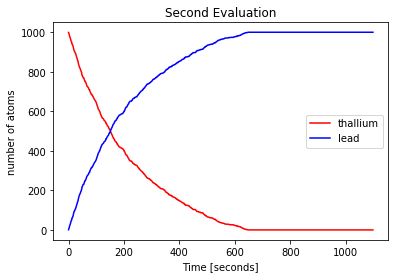

Decay time (in seconds) 648


In [5]:
def prob2(t, tau):
    return (2**(-t/tau))*(np.log(2))/tau

def inv_prob1(z, tau):
    return -tau*np.log2(1-z)

def decay2(i_prob1):
    temp_lead = []
    for i in range(1,len(i_prob1)):
        temp_lead.append(sum(1 if (x>=i-1 and x < i) else 0 for x in i_prob1))
    temp_lead = np.cumsum(temp_lead)
    temp_lead[temp_lead > 1000] = 1000
    return temp_lead

z = np.random.random(atom_thal + 100)
i_prob1 = np.sort(inv_prob1(z,tau))

temp_lead = decay2(i_prob1)
temp_thal = np.repeat(atom_thal, temp_lead.size) - temp_lead

decay_time = np.arange(temp_lead.size)[temp_thal == 0][0]

plt.title('Second Evaluation')
plt.xlabel('Time [seconds]')
plt.ylabel('number of atoms')
plt.plot(temp_thal,color='r')
plt.plot(temp_lead,color='b')
plt.legend(['thallium', 'lead'])
plt.show()
print('Decay time (in seconds)', decay_time)

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [13]:
from numpy import pi,sqrt,arctan,log

Z = 79
a0= 5.291*(10**(-11))
N=1000000
g = np.random.random(N)
r_squared = -2*(a0/100)**(2)*np.log(g)
b = sqrt(r_squared)
E = 7.7*1.609*10**(-13)
e = 1.609*(10**(-19))
eps0=8.89*10**(-12)

const = (Z*(e**2))/(2*pi*eps0*E)
theta = 2*arctan(const/b)
Answer = len(theta[theta>pi/2])/N 
print('particle whose scattering angle is greater than  𝜋/2:',Answer)

particle whose scattering angle is greater than  𝜋/2: 0.001454


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [18]:
from numpy import sin
def f(x):
    return (sin(1/(x*(2-x))))**2
count = 0
N = 100000
Sum3 = 0
for i in range(N):
    x = 2*np.random.rand()
    y = np.random.rand()
    if y < f(x): count += 1
    Sum3 += f(x)
    
Integral = 2*count/N
error1 = np.abs(np.round((Integral-1.4514),6))
print('Integral with hit/miss method:',Integral,'   The error is:',error1)

x=2*np.random.random(N)
Mean_value = (2/N)*sum(f(x))
error2 = np.abs(np.round((Mean_value-1.4514),6))
print('Integral with mean value method:',Mean_value,'   The error is:',error2)


Integral with hit/miss method: 1.44598    The error is: 0.00542
Integral with mean value method: 1.4512463796564175    The error is: 0.000154


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [23]:
Sum4_1 = 0
for i in range(N):
    x = np.random.random()
    y = np.random.random()
    if x**2+y**2<1:
        Sum4_1 += 1
Int4_1 = Sum4_1/N*4
error4_1 = np.abs(np.round((Int4_1-pi),6))

print('Integral value:',Int4_1,'   The error is:',error4_1)

Sum4_2 = 0
for i in range(N):
    x = np.random.rand(10)
    r = (x**2).sum()
    if r<1:
        Sum4_2 += 1
Int4_2 = Sum4_2/N*2**10
error4_2 = np.abs(np.round((Int4_2-pi),6))
print('Integral value for a 10D sphere:',Int4_2,'   The error is:',error4_2)

Integral value: 3.1458    The error is: 0.004207
Integral value for a 10D sphere: 2.78528    The error is: 0.356313


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [24]:
from numpy import exp
def f(x):
    return (x**(-0.5))/(exp(x)+1)

def w(x): 
    return 1/(x**(0.5)) 

N = 100000
Sum5 = 0

for i in range(N):
    x = np.random.rand()
    Sum5 += 2*f(x)/w(x)
    
Int5 = Sum5/N
error5 = np.abs(np.round((Int5-0.84),3))
print('Integral value :',Int5,'   The error is:',error5)

Integral value : 0.7595769028306633    The error is: 0.08
